### Install dependencies.

In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [3]:
# Install MMCV
!pip install -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.0"

Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html


In [4]:
!rm -rf mmsegmentation
!git clone -b main https://github.com/open-mmlab/mmsegmentation.git
%cd mmsegmentation
!pip install -v -e .

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 16266, done.
remote: Counting objects: 100% (632/632), done.
remote: Compressing objects: 100% (483/483), done.
remote: Total 16266 (delta 257), reused 369 (delta 133), pack-reused 15634
Receiving objects: 100% (16266/16266), 22.83 MiB | 31.72 MiB/s, done.
Resolving deltas: 100% (11270/11270), done.
/content/mmsegmentation
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Obtaining file:///content/mmsegmentation
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-5x21z36d/mmsegmentation.egg-info
  writing manifest file '/tmp/pip-pip-egg-info-5x21z36d/mmsegmentation.egg-info/SOURCES.txt'
  writing manifest file '/tmp/pip-pip-egg-info-5x21z36d/mmsegmentation.egg-info/SOURCES.txt'
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmsegmentation
    Running command python setup.py develop
    running develop
    /usr/local/lib/python3.

In [5]:
# Check Pytorch installation
import torch, torchvision
import matplotlib.pyplot as plt
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

2.0.1+cu118 True
1.2.0


### Run Inference with SegFormer trained weight

In [6]:
!mkdir checkpoints
!wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P checkpoints-mmlab.s3.ap-northeast-2.amazonaws.com/mmsegmentation/models/pspnet/pspn

--2023-10-13 08:56:40--  https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.246.20.231, 163.181.66.106, 8.38.121.210, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|47.246.20.231|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196205945 (187M) [application/octet-stream]
Saving to: ‘checkpoints-mmlab.s3.ap-northeast-2.amazonaws.com/mmsegmentation/models/pspnet/pspn/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth’

pspnet_r50-d8_512x1 100%[===================>] 187.12M  16.3MB/s    in 12s     

2023-10-13 08:56:53 (15.3 MB/s) - ‘checkpoints-mmlab.s3.ap-northeast-2.amazonaws.com/mmsegmentation/models/pspnet/pspn/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth’ saved [196205945/196205945]



In [7]:
!pip install ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.8 MB/s eta 0:00:00


In [8]:
from mmseg.apis import init_model, inference_model, mmseg_inferencer, show_result_pyplot

In [9]:
config_file = '/content/mmsegmentation/configs/pspnet/pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py'
checkpoint_file = '/content/mmsegmentation/checkpoints-mmlab.s3.ap-northeast-2.amazonaws.com/mmsegmentation/models/pspnet/pspn/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

In [10]:
# build the model from a config file and a checkpoint file
model = init_model(config_file, checkpoint_file, device='cuda:0')


/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:249: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: /content/mmsegmentation/checkpoints-mmlab.s3.ap-northeast-2.amazonaws.com/mmsegmentation/models/pspnet/pspn/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth


In [23]:

# test a single image
img = '/content/mmsegmentation/demo/frankfurt_000000_000294_leftImg8bit.png'
result = inference_model(model, img)

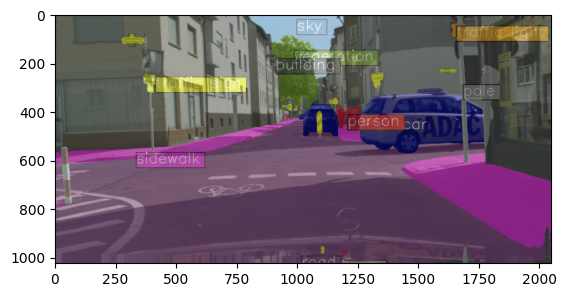

In [24]:
# display the segmentation result

vis_result = show_result_pyplot(model, img, result, show=False)
plt.imshow(vis_result)

In [25]:
# save the visualization result, the output image would be found at the path `work_dirs/result.png`
vis_image = show_result_pyplot(model, img, result, out_file='work_dirs/result.png')